# Business case: Based on the given features we need to categorize the similar players using their traits and different skills in the field.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('players_20.csv')
pd.set_option('display.max_columns', None)
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [3]:
for col in data.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

## Basic understanding of features - Domain Analysis

- sofifaid - ID of the player.

- player_url - Total details of the players are available here.

- short_name - short Name of the player.

- long_name - Full name of the player.

- Age - Age of the player.

- dob - Date of birth of the player.

- height_cm - Height of the player in centimeters.

- weight_kg - Weight in kilograms.

- nationality - To which country the player belong to.

- club - To which club the player is playing to.

- Overall - General performance of the player rated between 1-99.

- Potential - Maximum Overall rating expected to be reached by a player rated between 1-99.

- value_eur - The amount with which the player has bought in Euros.

- wage_eur - wage of the player per week in Euros.

- player_positions - Position of the players on the pitch which determines their roles and responsibilities in the team

- PreferredFoot - With which foot player likes to play most Right or Left.

- international_reputation - Reputation of the player internationally rated between 1 - 5.

- WeakFoot - Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 - 5.

- skill_moves - Skill moves by a player rated between 1 - 5.

- WorkRate - Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0 for low, 0.5 for medium and 1 for high.

- body_type - Body type of the player.

- real_face - wether real face of the player is displayed or not, yes or No.

- relese_clause_eur - price value of the player while releasing in Euros.

- player_tags - player tags are the positions in which they are likely to play.

- team_position - Position in which the player plays.

- team_jersey_number - Number on the players jersey.

- loaned_from - from which team the player is loaned.

- joined - Date when the player is joined in the team.

- contract_valid_until- End date of the player in team.

- pace - Running speed of the player while playing, rated between 1-99

- physic - Personality of the player, rated between 1-99.

- player_traits - Unique skills of the player.

- attacking_crossing - Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.

- attacking_finishing - Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by scoring a goal.

- attacking_heading_accuracy - Player’s accuracy to pass or shoot by using his head rated between 1-99.

- attacking_short_passing - Player’s accuracy for short passes rated between 1-99.

- attacking_volleys - Player’s ability to perform volleys rated between 1-99.

- skill_dribbling - Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while moving in one particular direction.

- skill_curve - Player’s ability to curve the ball while passing or shooting rated between 1-99.

- skill_fk_accuracy - Player’s accuracy to score free kick goals rated between 1-99.

- skill_long_passing - Player’s accuracy for long passes rated between 1-99.

- skill_ball_control - Player’s ability to control the ball rated between 1-99.

- movement_acceleration - Shows how fast a player can reach his maximum sprint speed rated between 1-99.

- movement_sprint_speed - Speed rate of the player rated between 1-99.

- movement_agility - Gracefulness and quickness of the player while controlling the ball rated between 1-99.

- movement_reactions - Acting speed of the player to what happens in his environment rated between 1-99.

- movement_balance - Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-99.

- power_shot_power - Player’s strength level of shooting the ball rated between 1-99.

- power_jumping - Player’s jumping skill rated between 1-99.

- power_stamina - Player’s ability to sustain his stamina level during the match rated between 1-99. Players with lower stamina get tired fast.

- power_strength - Physical strength of the player rated between 1-99.

- power_long_shots - Player’s accuracy of shoots from long distances rated between 1-99.

- mentality_aggression - Aggression level of the player while pushing, pulling and tackling rated between 1-99.

- mentality_interceptions - Player’s ability to intercept the ball while opposite team’s players are passing rated between 1-99.

- mentality_positioning - Player’s ability to place himself in the right position to receive the ball or score goals rated between 1- 99.

- mentality_vision - Player’s mental awareness about the other players in the team for passing rated between 1-99.

- mentality_penalties - Player’s accuracy to score goals from penalty rated between 1-99.

- mentality_composure - Player’s ability to control his calmness and frustration during the match rated between 1-99.

- defending_marking -Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-99.

- defending_standing_tackle - Player’s ability to perform tackle (take the ball from the opposite player) while standing rated between 1-99.

- defending_sliding_tackle - Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.

- Abilities of the goal keeper while playing the game

    - goalkeeping_diving
    - goalkeeping_handling
    - goalkeeping_kicking
    - goalkeeping_positioning
    - goalkeeping_reflexes
- player_positions - Position of the players on the pitch which determines their roles and responsibilities in the team. Forward positions in the FIFA 20 can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), forward (CF: center forward, RF: right forward, LF: left forward) and winger (RW: right winger, LW: left winger).

- Positions in fifa
    - LS: Positional skill. Player’s general ability while playing in Left Striker position rated between 1-99.
    - ST: Positional skill. Player’s general ability while playing in Center striker position rated between 1-99.
    - RS: Positional skill. Player’s general ability while playing in in Right Striker position rated between 1-99.
    - LW: Positional skill. Player’s general ability while playing in Left Wing position rated between 1-99.
    - LF: Positional skill. Player’s general ability while playing in Left Forward position rated between 1-99.
    - CF: Positional skill. Player’s general ability while playing in Center Forward position rated between 1-99.
    - RF: Positional skill. Player’s general ability while playing in Right Forward position rated between 1-99.
    - RW: Positional skill. Player’s general ability while playing in Right Wing position rated between 1-99.

# Data Preprocessing

In [4]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [5]:
data.shape

(18278, 104)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [7]:
# Dropping the unnecessary columns which are not useful for clustering the similar players depending on their skills.
data = data.drop(['sofifa_id','player_url','long_name','dob','body_type','nation_jersey_number','team_jersey_number', 'real_face','player_tags','loaned_from','joined','contract_valid_until','player_positions','nation_position', 'player_traits'], axis=1)

In [8]:
# Dropping some duplicate columns
data = data.drop(['shooting','passing','dribbling','defending','gk_diving', 'gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',], axis=1)

In [9]:
# Renaming short_name as name
data = data.rename({'short_name':'name'}, axis=1)
data = data.rename({'team_position' : 'position'}, axis=1)

In [10]:
data.head()

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,195800000.0,RW,87.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,96500000.0,LW,90.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,195200000.0,CAM,91.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,164700000.0,GK,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,184500000.0,LW,91.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  preferred_foot              18278 non-null  object 
 11  international_reputation    18278 non-null  int64  
 12  weak_foot                   18278 non-null  int64  
 13  skill_moves                 182

In [12]:
data.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,16242.000000,16242.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,67.700899,64.876678,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,11.297656,9.760162,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,24.000000,27.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,61.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,58.000000,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,1.200000e+06,69.000000,66.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,66.000000,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,3.000000,3.700000e+06,75.000000,72.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.0000

## Checking for Null values

In [13]:
pd.set_option('display.max_rows', 80)
data.isnull().sum()

name                             0
age                              0
height_cm                        0
weight_kg                        0
nationality                      0
club                             0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
preferred_foot                   0
international_reputation         0
weak_foot                        0
skill_moves                      0
work_rate                        0
release_clause_eur            1298
position                       240
pace                          2036
physic                        2036
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control  

## Replacing Null values with mean

In [14]:
# Numerical columns
data['release_clause_eur'] = data['release_clause_eur'].fillna(data['release_clause_eur'].mean())
data['pace'] = data['pace'].fillna(data['pace'].mean())
data['physic'] = data['physic'].fillna(data['physic'].mean())

In [15]:
# categorical column
data.position.value_counts()

SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: position, dtype: int64

In [16]:
data['position'] = data['position'].replace(np.NaN, 'unknown')

In [17]:
#position Columns

#Function to convert position skill rating at each position.
def PositionConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    else:
        return val

position_columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm',
    'cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for col in position_columns:
    data[col] = data[col].apply(PositionConverter)
    data[col].fillna(0.0, inplace = True)

In [18]:
data.isnull().sum()

name                          0
age                           0
height_cm                     0
weight_kg                     0
nationality                   0
club                          0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
release_clause_eur            0
position                      0
pace                          0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement

In [19]:
# Now data doesn't have any Missing values

In [20]:
data.head()

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,195800000.0,RW,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,96500000.0,LW,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,195200000.0,CAM,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,184500000.0,LW,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0


## Converting categorical features to Numerical

### Workrate

In [21]:
data.work_rate.value_counts()

Medium/Medium    9875
High/Medium      3216
Medium/High      1718
High/High         986
Medium/Low        886
High/Low          684
Low/Medium        461
Low/High          417
Low/Low            35
Name: work_rate, dtype: int64

In [22]:
#Split the Work Rate Column 
data['work_rate'] = data['work_rate'].str.split("/").str[0]

In [23]:
data.work_rate.value_counts()

Medium    12479
High       4886
Low         913
Name: work_rate, dtype: int64

In [24]:
data['work_rate'] = data['work_rate'].replace({'High':2 , 'Medium':1 , 'Low':0 })

In [25]:
data.work_rate.value_counts()

1    12479
2     4886
0      913
Name: work_rate, dtype: int64

In [26]:
data.head()

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,2,96500000.0,LW,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,2,195200000.0,CAM,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,1,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,2,184500000.0,LW,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  preferred_foot              18278 non-null  object 
 11  international_reputation    18278 non-null  int64  
 12  weak_foot                   18278 non-null  int64  
 13  skill_moves                 182

In [28]:
data.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,1.217365,4.740717e+06,67.700899,64.876678,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924,53.192034,53.192034,53.192034,54.298501,54.023416,54.023416,54.023416,54.298501,54.266824,54.266824,54.266824,54.902451,53.549240,53.549240,53.549240,54.902451,52.797078,52.208064,52.208064,52.208064,52.797078,52.153791,51.090382,51.090382,51.090382,52.153791
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,0.519648,1.063114e+07,10.649820,9.200490,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125,20.733829,20.733829,20.733829,21.363255,21.267185,21.267185,21.267185,21.363255,21.305434,21.305434,21.305434,21.306409,20.707756,20.707756,20.707756,21.306409,20.550042,20.827602,20.827602,20.827602,20.550042,20.569076,21.232318,21.232318,21.232318,20.569076
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,1.300000e+04,24.000000,27.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

### Now all the data is in Numerical form

# Exploratory Data Analysis

## Univariate Analysis

In [29]:
import sweetviz as sv
my_report= sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Insights from the Univariate analysis**
* Most of the players age is between 20-25.
* Average height of the players is 181cms.
* Most of the players are from England.
* Highest preferrd foot of the players is Right.

## Players from Top 10 countries

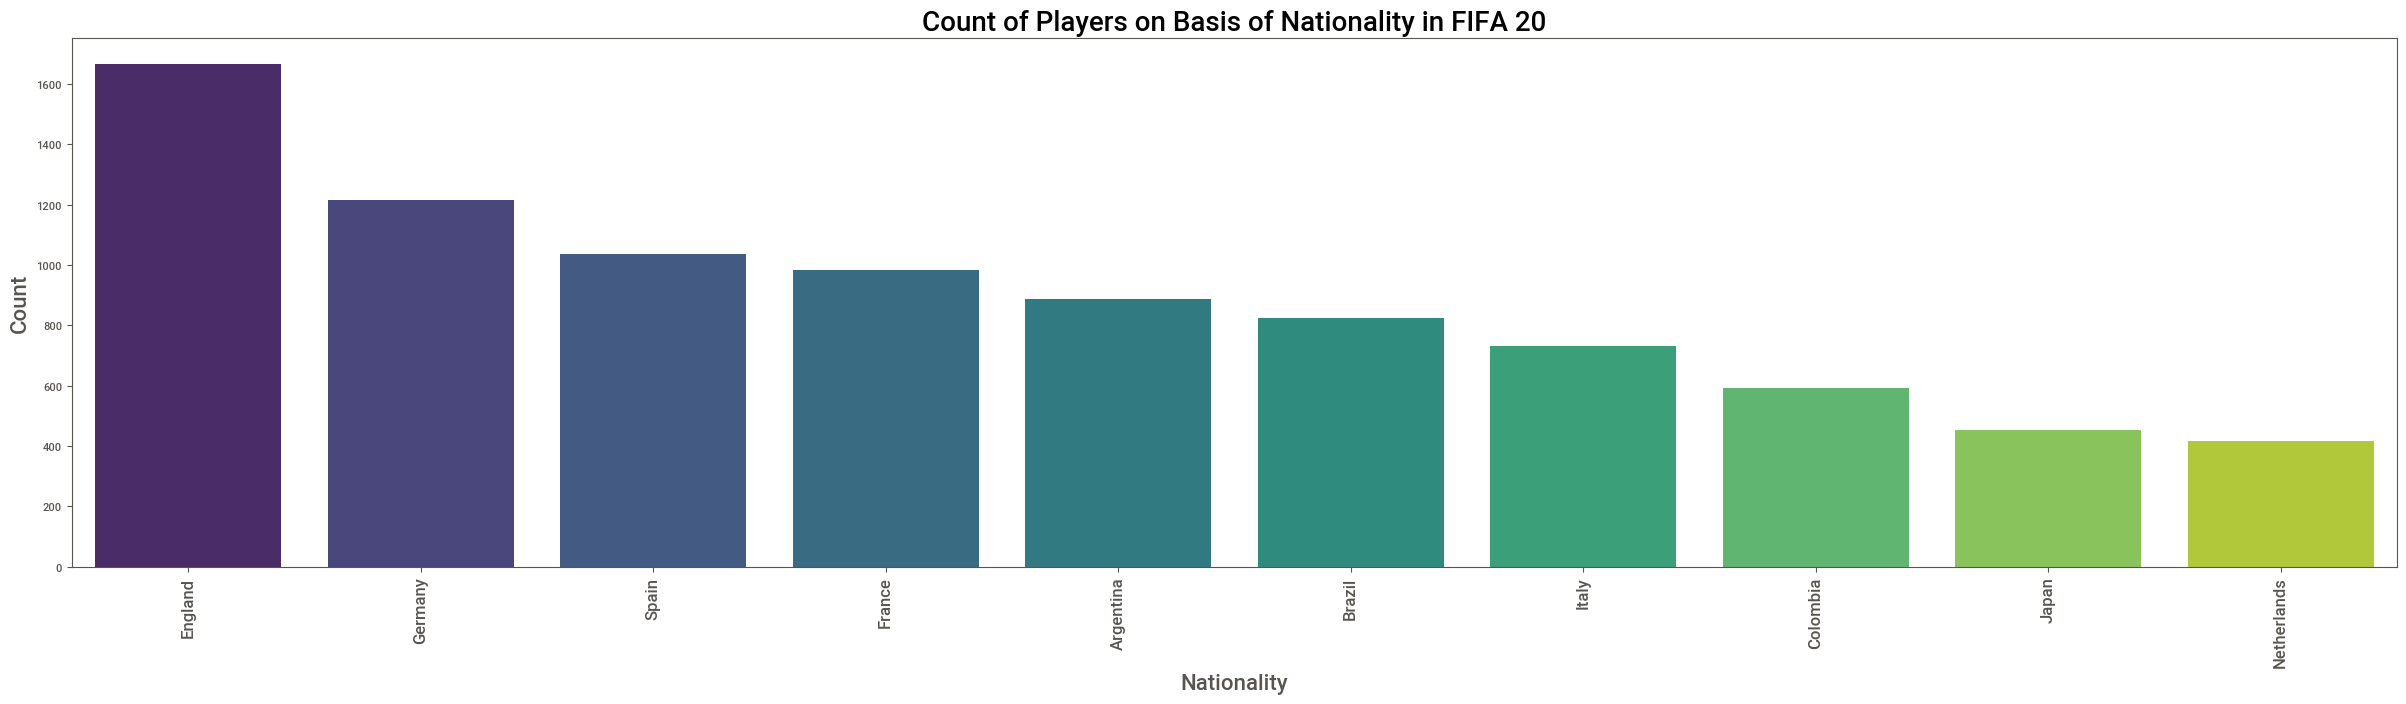

In [30]:
plt.figure(figsize= (30, 7))
ax = sns.countplot(x='nationality', data= data, palette='viridis', order= data.nationality.value_counts().iloc[:10].index)
ax.set_title(label='Count of Players on Basis of Nationality in FIFA 20', fontsize=20)
ax.set_xlabel(xlabel='Nationality', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.show()

From the graph it is clear that most number of players are from England

In [31]:
data_top_rated = data.sort_values(by=["overall"], ascending=False)
data_top_rated.head(10)

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,2,96500000.0,LW,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,2,195200000.0,CAM,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,1,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,2,184500000.0,LW,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,2,166500000.0,RCM,76.000000,78.000000,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,Right,3,4,1,1,143400000.0,GK,67.700899,64.876678,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,200000,Right,3,3,2,1,150200000.0,LCB,77.000000,86.000000,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11,72.0,72.0,72.0,70.0,72.0,72.0,72.0,70.0,72.0,72.0,72.0,72.0,77.0,77.0,77.0,72.0,82.0,86.0,86.0,86.0,82.0,84.0,90.0,90.0,90.0,84.0
8,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,340000,Right,4,4,4,2,92300000.0,RCM,74.000000,66.000000,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9,80.0,80.0,80.0,87.0,86.0,86.0,86.0,87.0,89.0,89.0,89.0,88.0,90.0,90.0,90.0,88.0,84.0,84.0,84.0,84.0,84

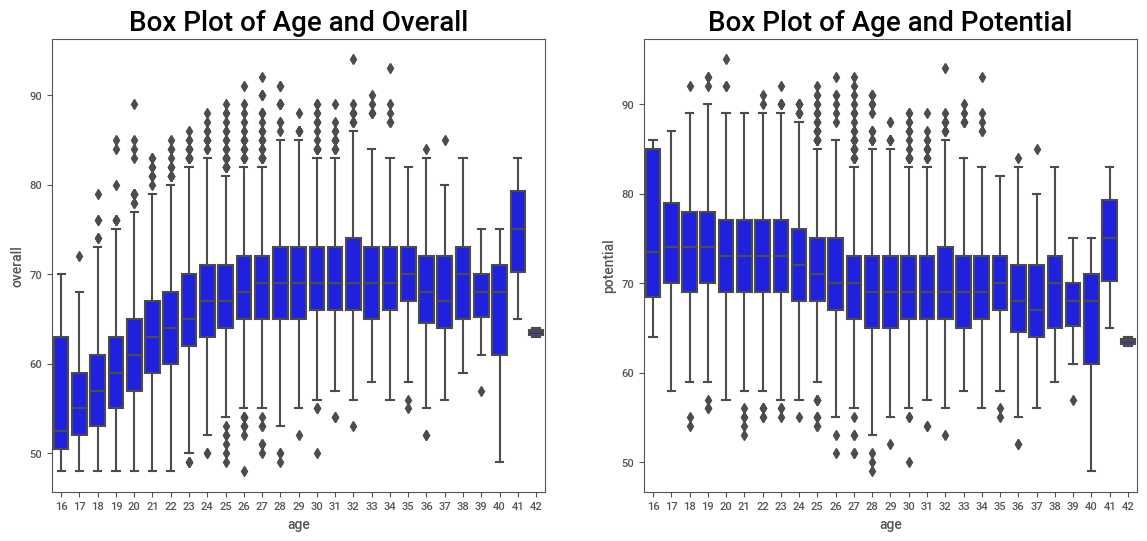

In [32]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data=data, x="age", y="overall",palette=["blue"])
plt.title("Box Plot of Age and Overall",fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=data, x="age", y="potential",palette=["blue"])
plt.title("Box Plot of Age and Potential",fontsize=20)
plt.show()

After the age of 38, the players are not showing any improvement.

In [33]:
data.club.value_counts()

FC Barcelona                  33
Real Valladolid CF            33
VfL Wolfsburg                 33
Crystal Palace                33
Eintracht Frankfurt           33
                              ..
US Orléans Loiret Football     1
Canada                         1
Mexico                         1
Turkey                         1
Śląsk Wrocław                  1
Name: club, Length: 698, dtype: int64

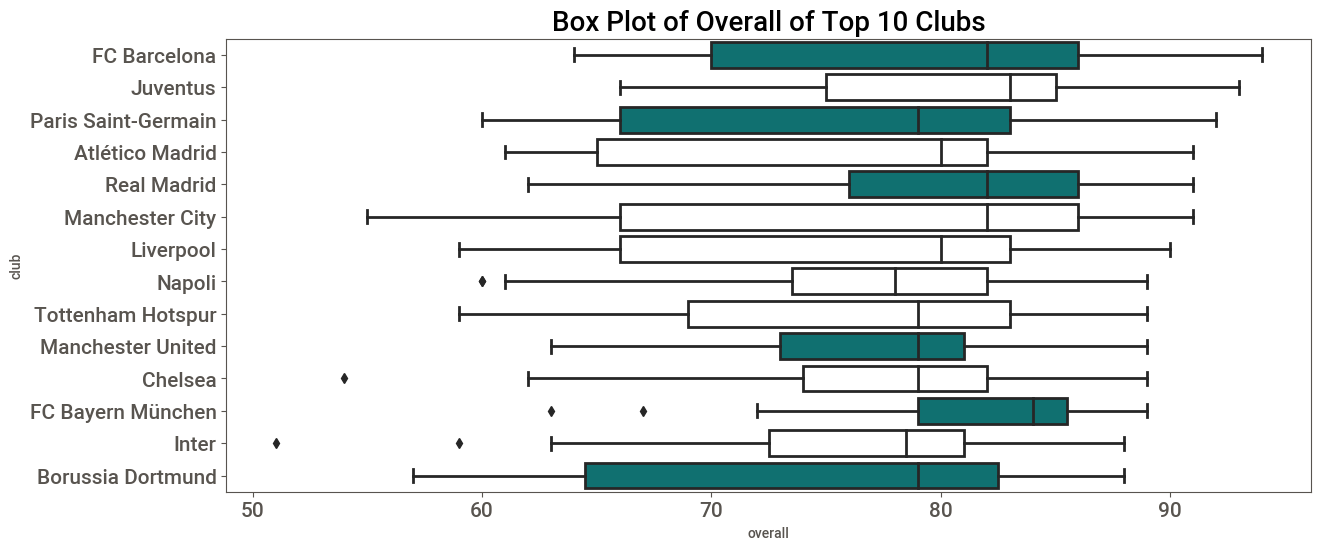

In [34]:
club = data.loc[(data["club"]=="Real Madrid")|
      (data["club"]=="Manchester City")|
      (data["club"]=="FC Barcelona")|
      (data["club"]=="Tottenham Hotspur")|
      (data["club"]=="Paris Saint-Germain")|
      (data["club"]=="Liverpool")|
      (data["club"]=="Juventus")|
      (data["club"]=="Napoli")|
      (data["club"]=="FC Bayern München")|
      (data["club"]=="Manchester United")|
      (data["club"]=="Inter")|
      (data["club"]=="Borussia Dortmund")|
      (data["club"]=="Atlético Madrid")|
      (data["club"]=="Chelsea")|
      (data["club"]=="Arsenal ")]

plt.figure(figsize=(14,6))
sns.boxplot(data=club,y="club",x="overall",
            palette=["teal","white","teal","white","teal"]+["white"]*4,linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Box Plot of Overall of Top 10 Clubs",fontsize=20)
plt.show()

## Overall Ratings of players Vs Value in Euros

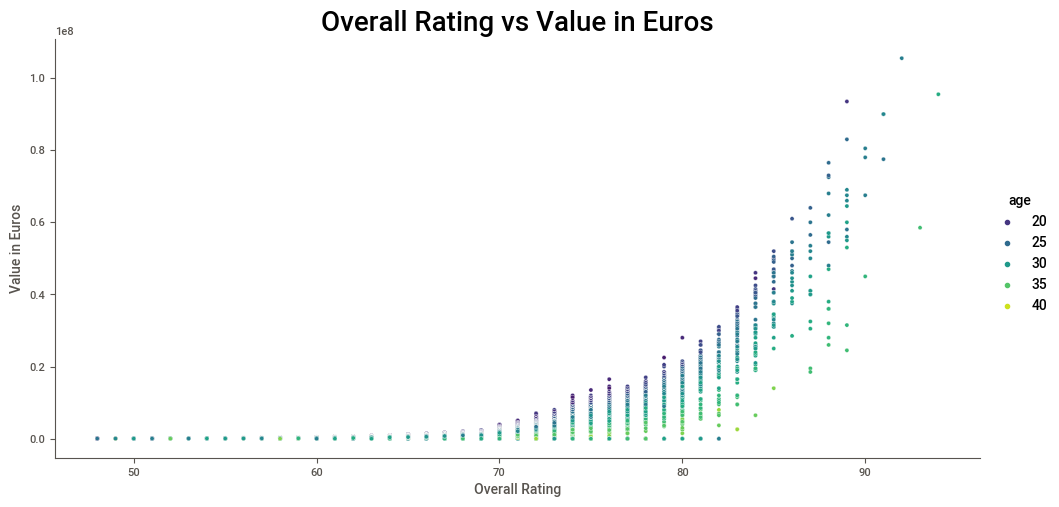

In [35]:
sns.relplot(x='overall', y='value_eur', hue='age', palette='viridis', sizes=(15, 200), aspect=2, data= data)
plt.title('Overall Rating vs Value in Euros', fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

## Overall potential of players Vs Wage of players in Euros

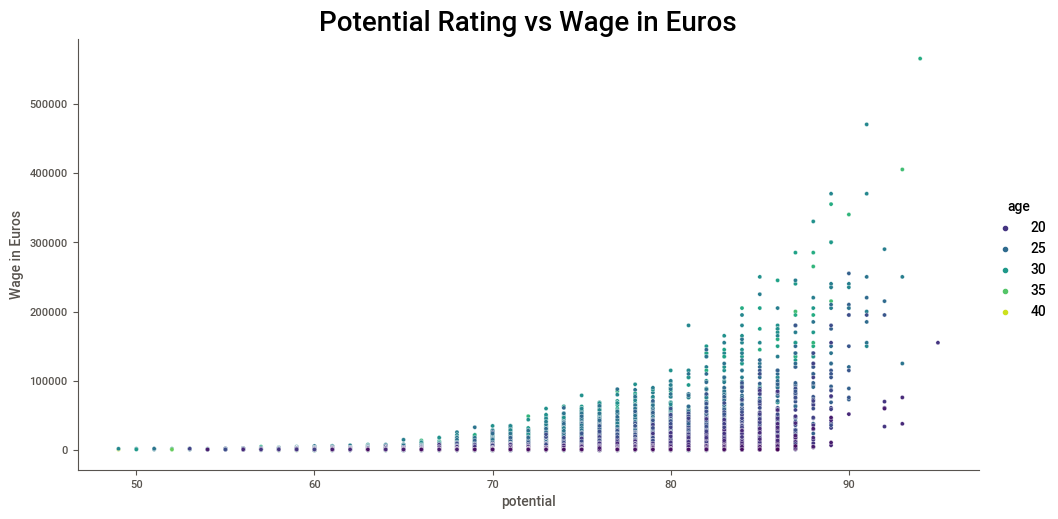

In [36]:
sns.relplot(data = data, x='potential', y='wage_eur', hue='age', palette='viridis', sizes=(15, 200), aspect=2)
plt.title('Potential Rating vs Wage in Euros', fontsize = 20)
plt.xlabel('potential')
plt.ylabel('Wage in Euros')
plt.show()

## Top paid positions of players

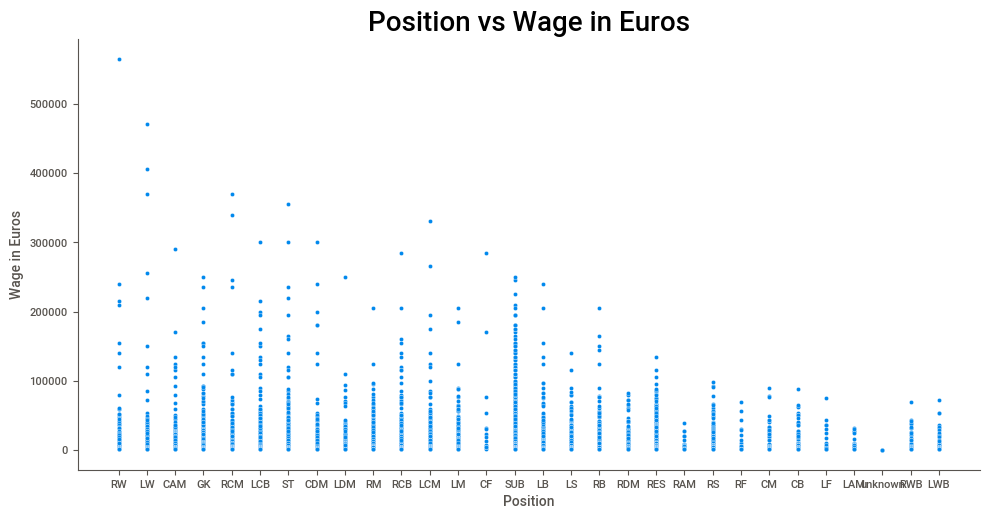

In [38]:
sns.relplot(data = data, x='position', y='wage_eur', sizes=(15, 200), aspect=2)
plt.title('Position vs Wage in Euros', fontsize = 20)
plt.xlabel('Position')
plt.ylabel('Wage in Euros')
plt.show()

The Right Wing players tend to get paid the most.

## Analysing the foot preferences of players

In [39]:
data.preferred_foot.value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

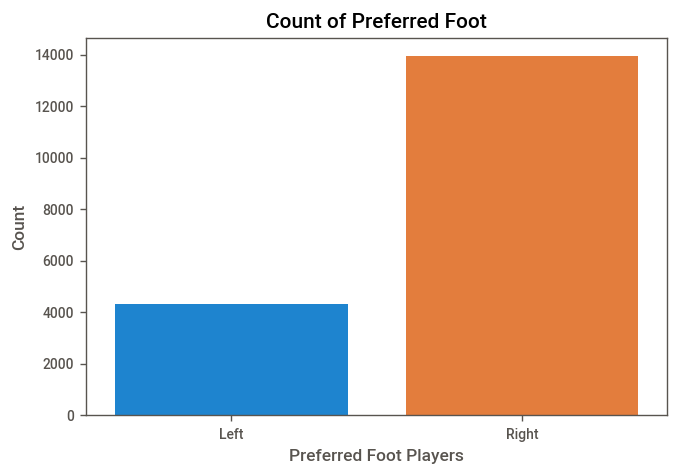

In [40]:
plt.figure(dpi=125)
sns.countplot(x='preferred_foot', data= data)
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')
plt.show()

Most of the players play by right foot

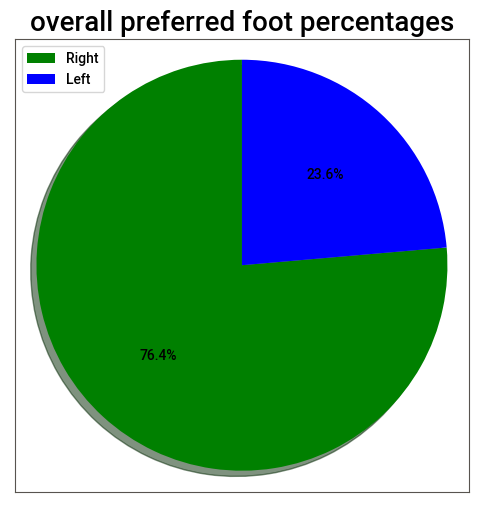

In [41]:
labels  = data["preferred_foot"].value_counts().index
sizes   = data["preferred_foot"].value_counts().values
plt.figure(figsize=(10,6))
plt.pie(x=sizes, shadow=True,autopct='%1.1f%%', startangle=90, frame=True,colors=["green","blue"])
plt.legend(labels)
plt.title("overall preferred foot percentages",fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

## Top 100 players International reputation

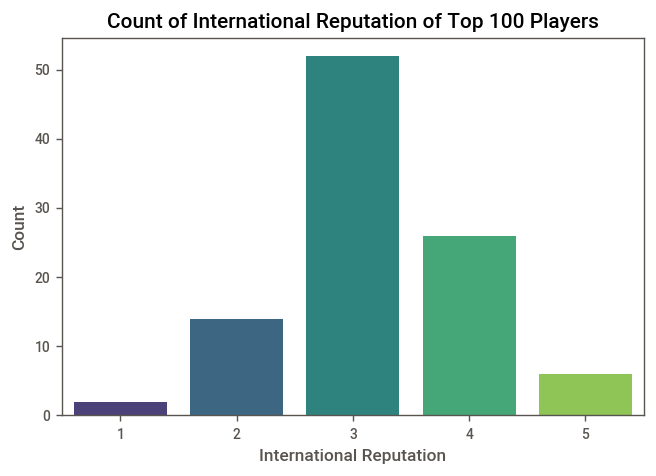

In [42]:
plt.figure(dpi=125)
sns.countplot('international_reputation', data= data.head(100), palette='viridis')
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.title('Count of International Reputation of Top 100 Players')
plt.show()

## Analysing the age of players

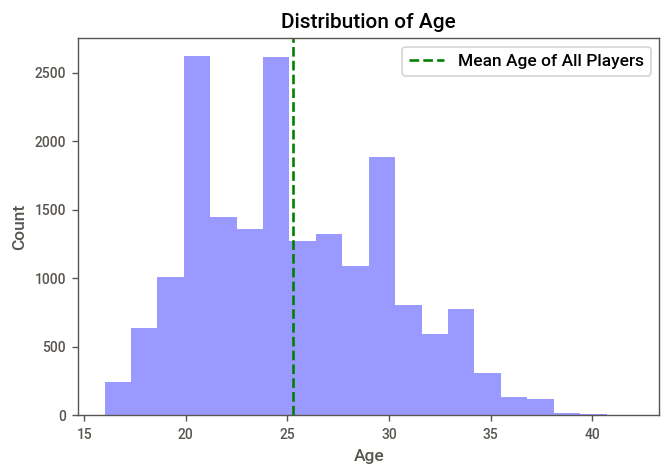

In [43]:
plt.figure(dpi=125)
sns.distplot(a= data['age'], kde=False, bins=20, color='blue')
plt.axvline(x=np.mean(data['age']), c='green', ls='--', label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

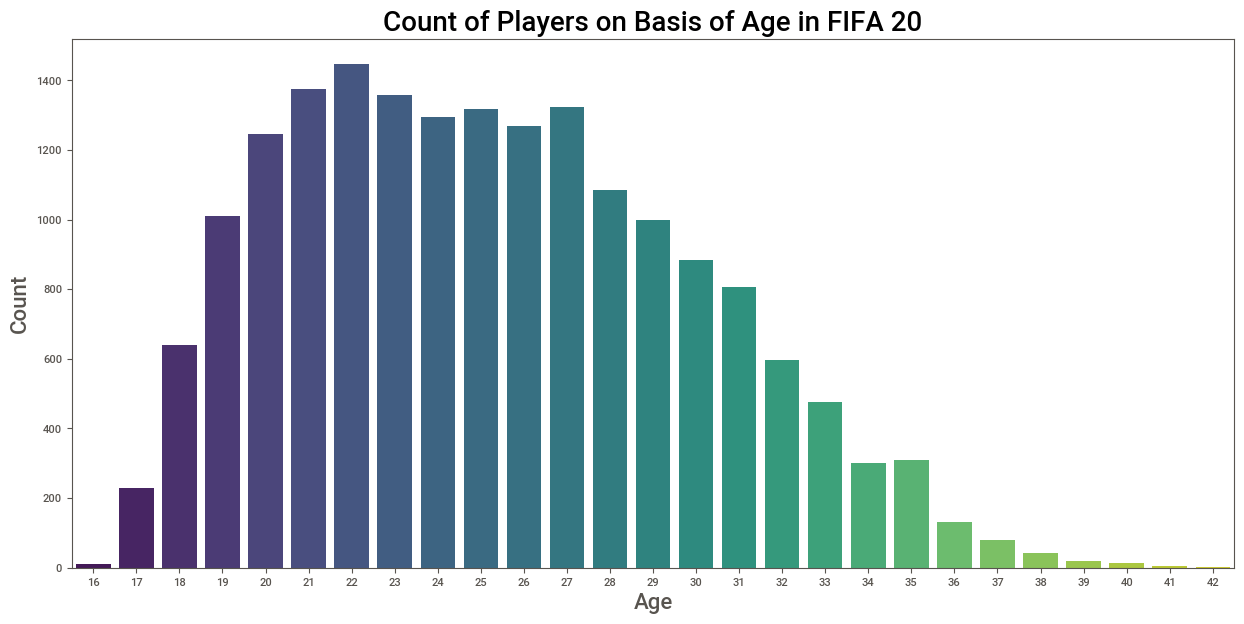

In [44]:
plt.figure(figsize= (15,7))
ax = sns.countplot(x='age', data=data, palette='viridis')
ax.set_title(label='Count of Players on Basis of Age in FIFA 20', fontsize=20)
ax.set_xlabel(xlabel='Age', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.show()

From the graph it is clear that maximum number of players played in the fifa are 22 years 

## Analyzing Top 20 players

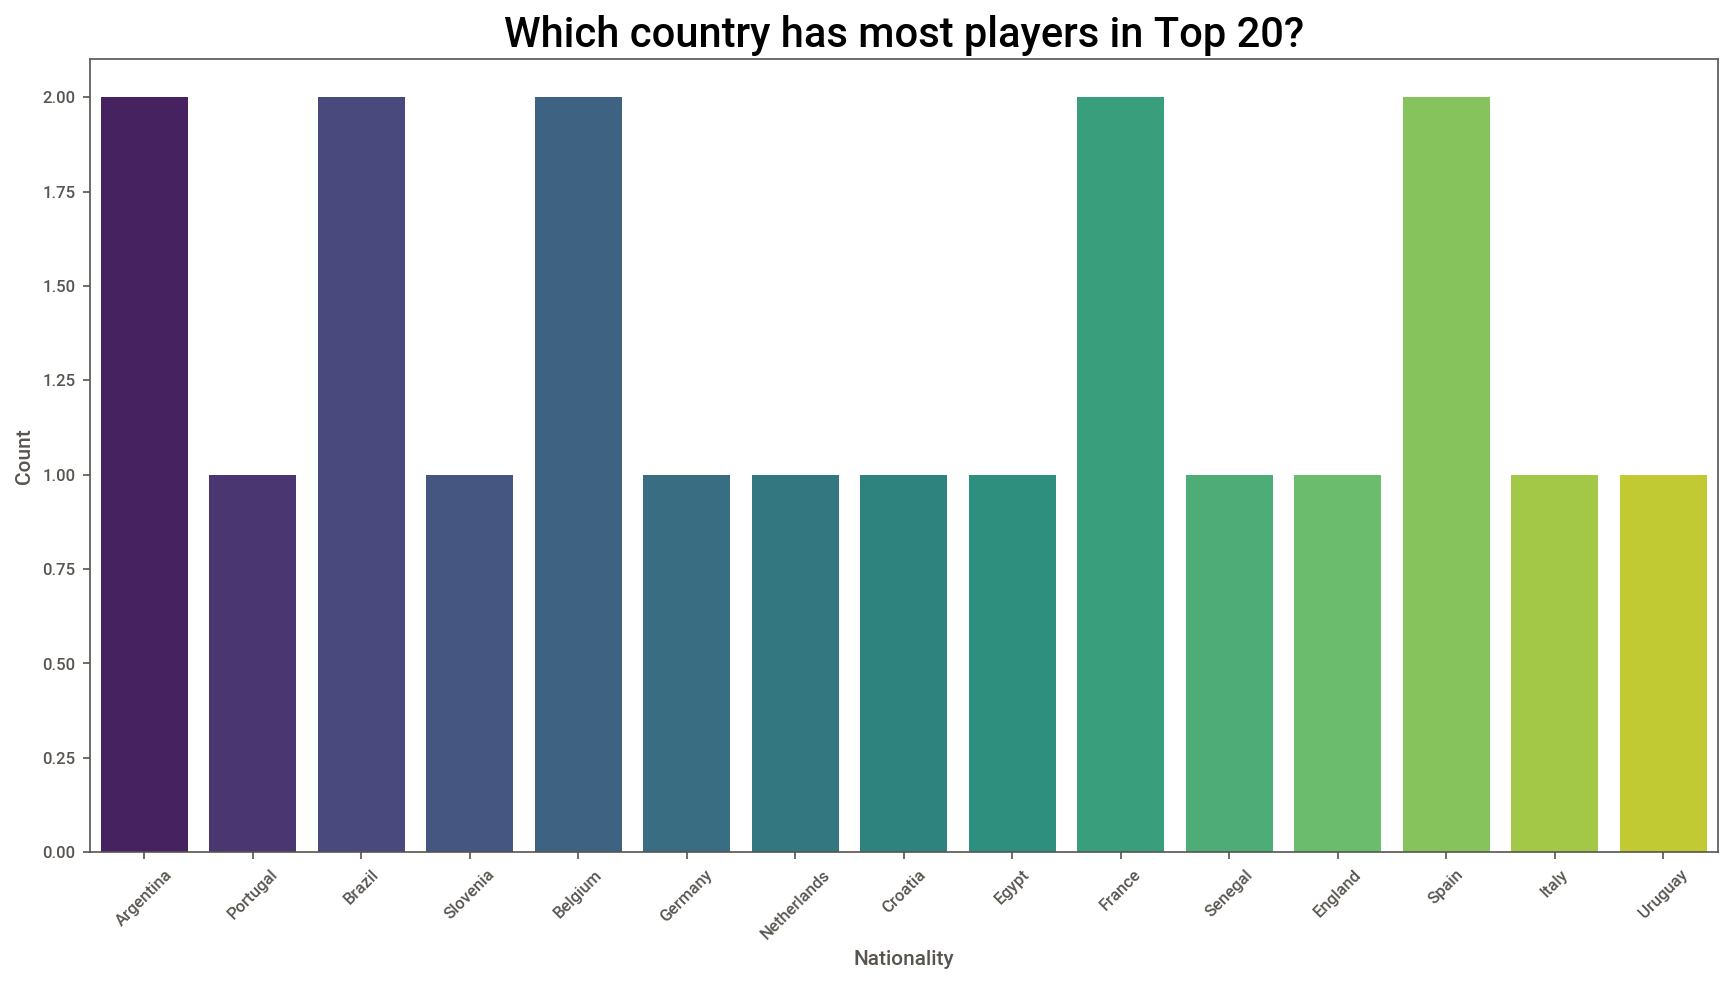

In [45]:
plt.figure(figsize=(14,7), dpi=150)
sns.countplot(x='nationality', data=data.head(20), palette='viridis')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which country has most players in Top 20?', fontsize = 20)
plt.show()

From the graph it is clear that players from Argentina, Brazil, Belgium, France and Spain are in Top 20

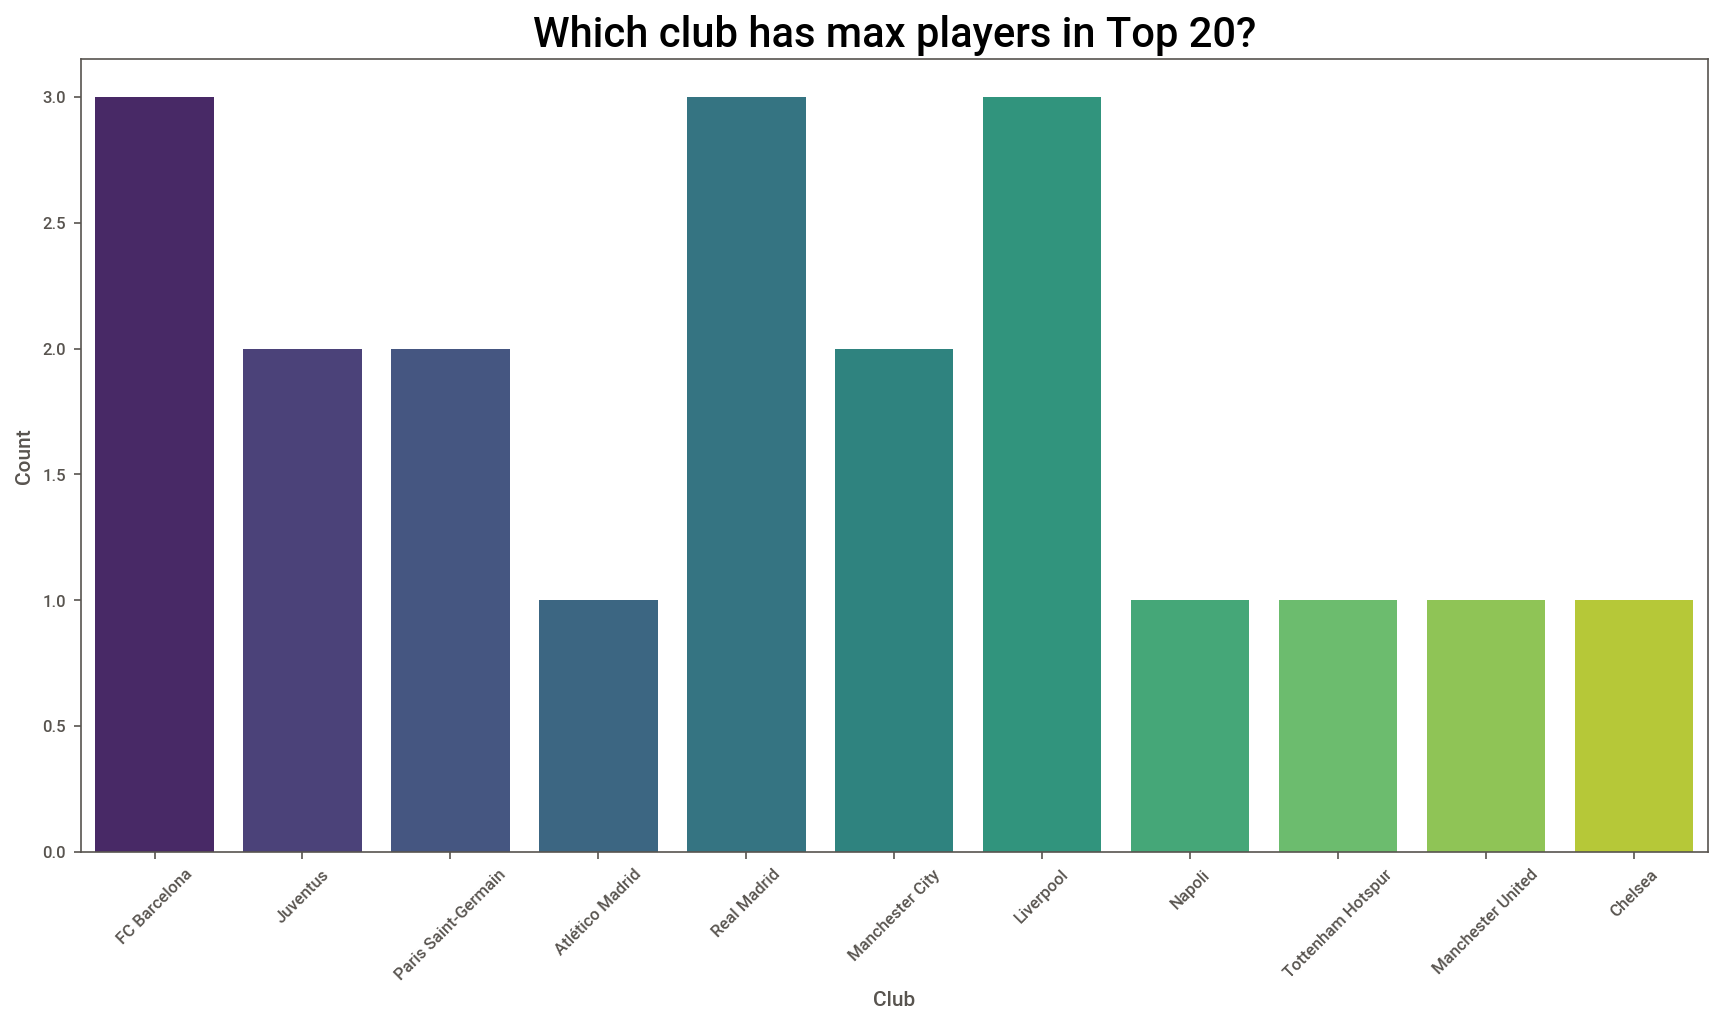

In [46]:
plt.figure(figsize=(14,7), dpi=150)
sns.countplot('club', data=data.head(20), palette='viridis')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which club has max players in Top 20?', fontsize = 20)
plt.show()

From the graph we can see that FC Barcelona, Real Madrid and Liverpool has most players in Top 20

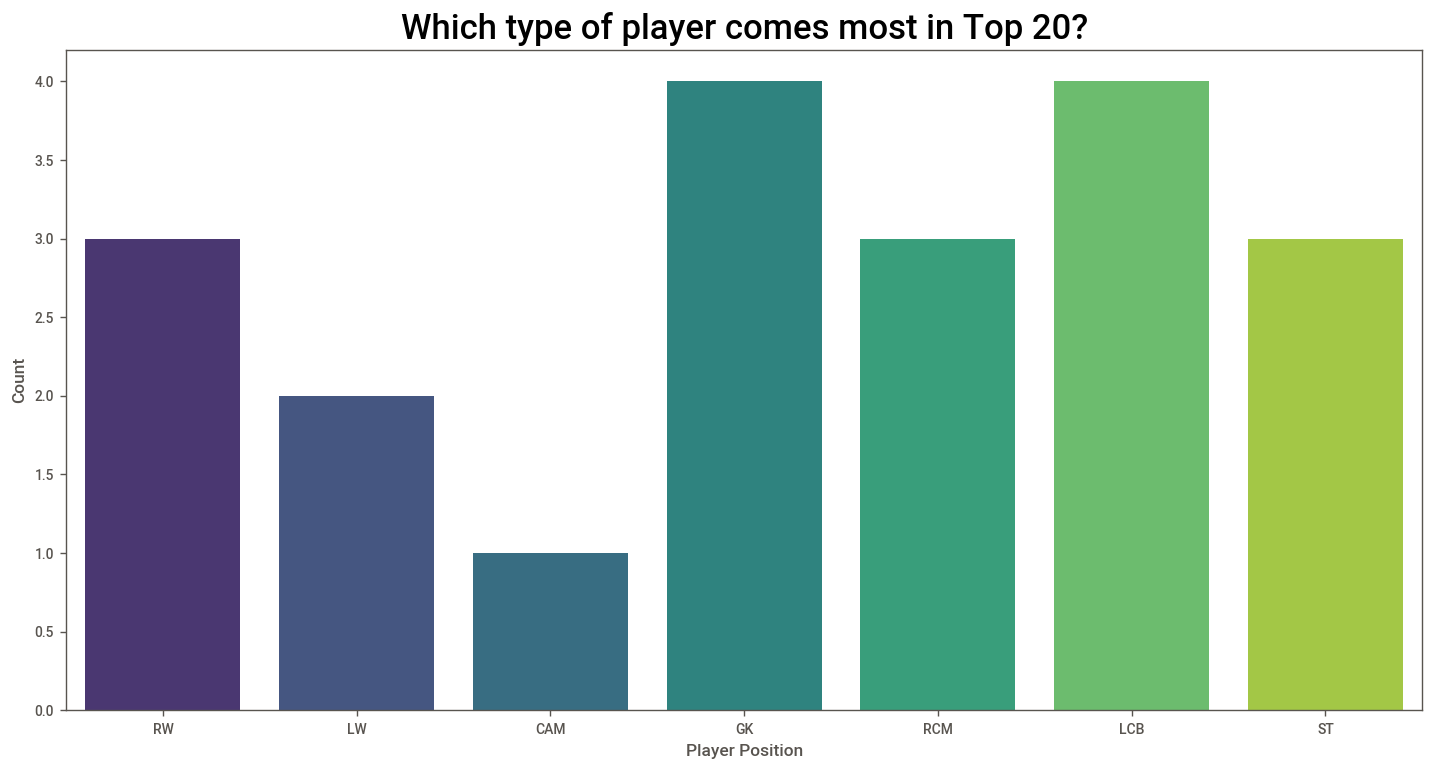

In [47]:
plt.figure(figsize=(14,7),dpi=125)
sns.countplot('position', data=data.head(20), palette='viridis')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.title('Which type of player comes most in Top 20?', fontsize = 20)
plt.show()

Goal Keeper and Left Corner Back postion players comes most in Top 20

In [48]:
DEFENDING = ["CB","LB","LCB","LWB","RB","RCB","RWB"]
MIDFIELD = ["CAM","CDM","CM","LAM","LCM","LDM","LM","RAM","RCM","RDM","RM"]
ATTACKING = ["CF","LF","RF","RS","RW","LW","LS","ST"]
GOALKEEPER = ["GK"]

In [49]:
main = []

for i in data["position"]:
    if i in DEFENDING:
        main.append("Defending")
    elif i in MIDFIELD:
        main.append("Midfield")
    elif i in ATTACKING:
        main.append("Attacking")
    elif i in GOALKEEPER:
        main.append("Goalkeeper")
    else:
        main.append(np.nan)
data["main_position"] = main

In [50]:
data.head(5)

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0,Attacking
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,2,96500000.0,LW,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,Attacking
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,2,195200000.0,CAM,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0,Midfield
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,1,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,2,184500000.0,LW,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0,Attacking


## High Valued player in Fifa20

In [51]:
data_high_value = data.sort_values(by=['value_eur'], ascending=False)
data_high_value.head(10)

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,2,195200000.0,CAM,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0,Midfield
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0,Attacking
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,Right,3,4,5,2,191700000.0,RW,96.000000,75.000000,78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32,13,5,7,11,6,89.0,89.0,89.0,90.0,90.0,90.0,90.0,90.0,89.0,89.0,89.0,89.0,81.0,81.0,81.0,89.0,69.0,65.0,65.0,65.0,69.0,66.0,57.0,57.0,57.0,66.0,Attacking
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,2,166500000.0,RCM,76.000000,78.000000,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,Midfield
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,2,184500000.0,LW,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0,Attacking
12,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,Right,3,4,3,2,159800000.0,ST,70.000000,83.000000,75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,89.0,89.0,89.0,85.0,87.0,87.0,87.0,85.0,86.0,86.0,86.0,85.0,82.0,82.0,82.0,85.0,68.0,69.0,69.0,69.0,68.0,65.0,63.0,63.0,63.0,65.0,Attacking
9,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,240000,Left,3,3,4,2,148900000.0,RW,93.000000,74.000000,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14,87.0,87.0,87.0,91.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,90.0,84.0,84.0,84.0,90.0,73.0,70.0,70.0,70.0,73.0,69.0,60.0,60.0,60.0,69.0,Attacking
7,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,200000,Right,3,3,2,1,150200000.0,LCB,77.000000,86.000000,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11,72.0,72.0,72.0,70.0,72.0,72.0,72.0,70.0,72.0,72.0,72.0,72.0,77.0,77.0,77.0,72.0,82.0,86.0,86.0,86.0,82.0,84.0,90.0,90.0,90.0,84.0,Defending
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,1,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,1

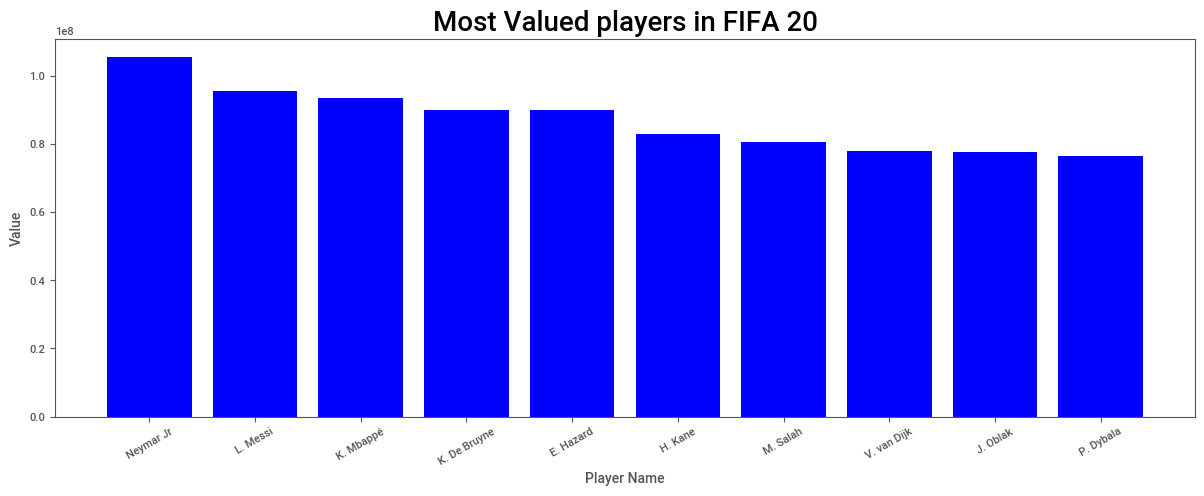

In [52]:
plt.figure(figsize = (50, 5))
plt.subplot(131)
plt.bar(data_high_value["name"].head(10), data_high_value["value_eur"].head(10), color='blue')
plt.tick_params(axis="x", rotation=30)
plt.ylabel("Value")
plt.xlabel("Player Name")
plt.title("Most Valued players in FIFA 20", fontsize=20)
plt.show()

From the graph we can say that Neymar Jr is the most valuable player in fifa 20

In [53]:
data_top_attackers = data[data['position'].str.contains('ST|RW|LW|CF|LS|RS')==True].sort_values(by="overall", ascending=False)
data_top_attackers.head(10)

,name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0,Attacking
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,2,96500000.0,LW,90.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,Attacking
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,2,184500000.0,LW,91.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0,Attacking
9,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,240000,Left,3,3,4,2,148900000.0,RW,93.0,74.0,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14,87.0,87.0,87.0,91.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,90.0,84.0,84.0,84.0,90.0,73.0,70.0,70.0,70.0,73.0,69.0,60.0,60.0,60.0,69.0,Attacking
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,Right,3,4,5,2,191700000.0,RW,96.0,75.0,78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32,13,5,7,11,6,89.0,89.0,89.0,90.0,90.0,90.0,90.0,90.0,89.0,89.0,89.0,89.0,81.0,81.0,81.0,89.0,69.0,65.0,65.0,65.0,69.0,66.0,57.0,57.0,57.0,66.0,Attacking
12,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,Right,3,4,3,2,159800000.0,ST,70.0,83.0,75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,89.0,89.0,89.0,85.0,87.0,87.0,87.0,85.0,86.0,86.0,86.0,85.0,82.0,82.0,82.0,85.0,68.0,69.0,69.0,69.0,68.0,65.0,63.0,63.0,63.0,65.0,Attacking
17,S. Agüero,31,173,70,Argentina,Manchester City,89,89,60000000,300000,Right,4,4,4,2,111000000.0,ST,80.0,74.0,70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,13,15,6,11,14,90.0,90.0,90.0,88.0,90.0,90.0,90.0,88.0,88.0,88.0,88.0,86.0,80.0,80.0,80.0,86.0,63.0,61.0,61.0,61.0,63.0,59.0,53.0,53.0,53.0,59.0,Attacking
19,L. Suárez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,Right,5,4,3,2,108700000.0,ST,73.0,84.0,78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37,91.0,91.0,91.0,88.0,90.0,90.0,90.0,88.0,89.0,89.0,89.0,87.0,84.0,84.0,84.0,87.0,72.0,72.0,72.0,72.0,72.0,69.0,68.0,68.0,68.0,69.0,Attacking
20,R. Lewandowski,30,184,80,Poland,FC Bayern München,89,89,64500000,235000,Right,4,4,4,2,106400000.0,ST,77.0,82.0,62,88,85,82,88,85,77,85,65,88,77,77,78,90,82,87,84,78,84,84,81,39,91,77,86,86,34,42,19,15,6,12,8,10,89.0,89.0,89.0,85.0,88.0,88.0,88.0,85.0,86.0,86.0,86

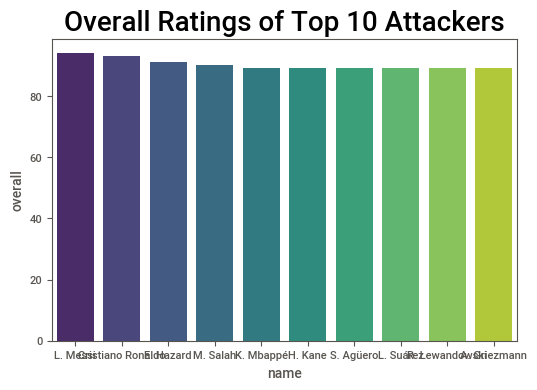

In [54]:
sns.barplot(data_top_attackers['name'].head(10), data_top_attackers['overall'].head(10), palette="viridis").set_title("Overall Ratings of Top 10 Attackers", fontsize=20);

In [55]:
names = data.name.tolist() # saving names for later
data = data.drop(['name'], axis = 1) # drop the name column

In [56]:
data.head()

,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,position,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,main_position
0,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,1,195800000.0,RW,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0,Attacking
1,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,2,96500000.0,LW,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,Attacking
2,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,2,195200000.0,CAM,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0,Midfield
3,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,1,164700000.0,GK,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
4,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,2,184500000.0,LW,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0,Attacking


In [57]:
# Extracting certain data

In [58]:
data = data[['age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves','pace','physic','attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [59]:
data.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [60]:
data = data[data.overall > 86] # extracting players with overall above 86
data

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,87.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,90.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,91.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,67.700899,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,91.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
5,28,181,70,91,91,90000000,370000,4,5,4,76.000000,78.000000,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13
6,27,187,85,90,93,67500000,250000,3,4,1,67.700899,64.876678,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90
7,27,193,92,90,91,78000000,200000,3,3,2,77.000000,86.000000,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11
8,33,172,66,90,90,45000000,340000,4,4,4,74.000000,66.000000,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9
9,27,175,71,90,90,80500000,240000,3,3,4,93.000000,74.000000,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14


In [61]:
#Normalising the data

from sklearn import preprocessing
x = data.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

## Using PCA to reduce 60 columns into 2

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

## Performing K-means clustering

In [63]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=3)

# fit the input data
kmeans = kmeans.fit(reduced)

# get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

## Making a new data frame by adding players' names and their cluster

In [64]:
reduced['cluster'] = clusters
reduced['name'] = pd.DataFrame(names)
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.366005,-1.172629,0,L. Messi
1,-1.145082,-0.826301,0,Cristiano Ronaldo
2,-1.208464,-1.340406,0,Neymar Jr
3,3.023164,-0.553762,1,J. Oblak
4,-1.114727,-1.082362,0,E. Hazard


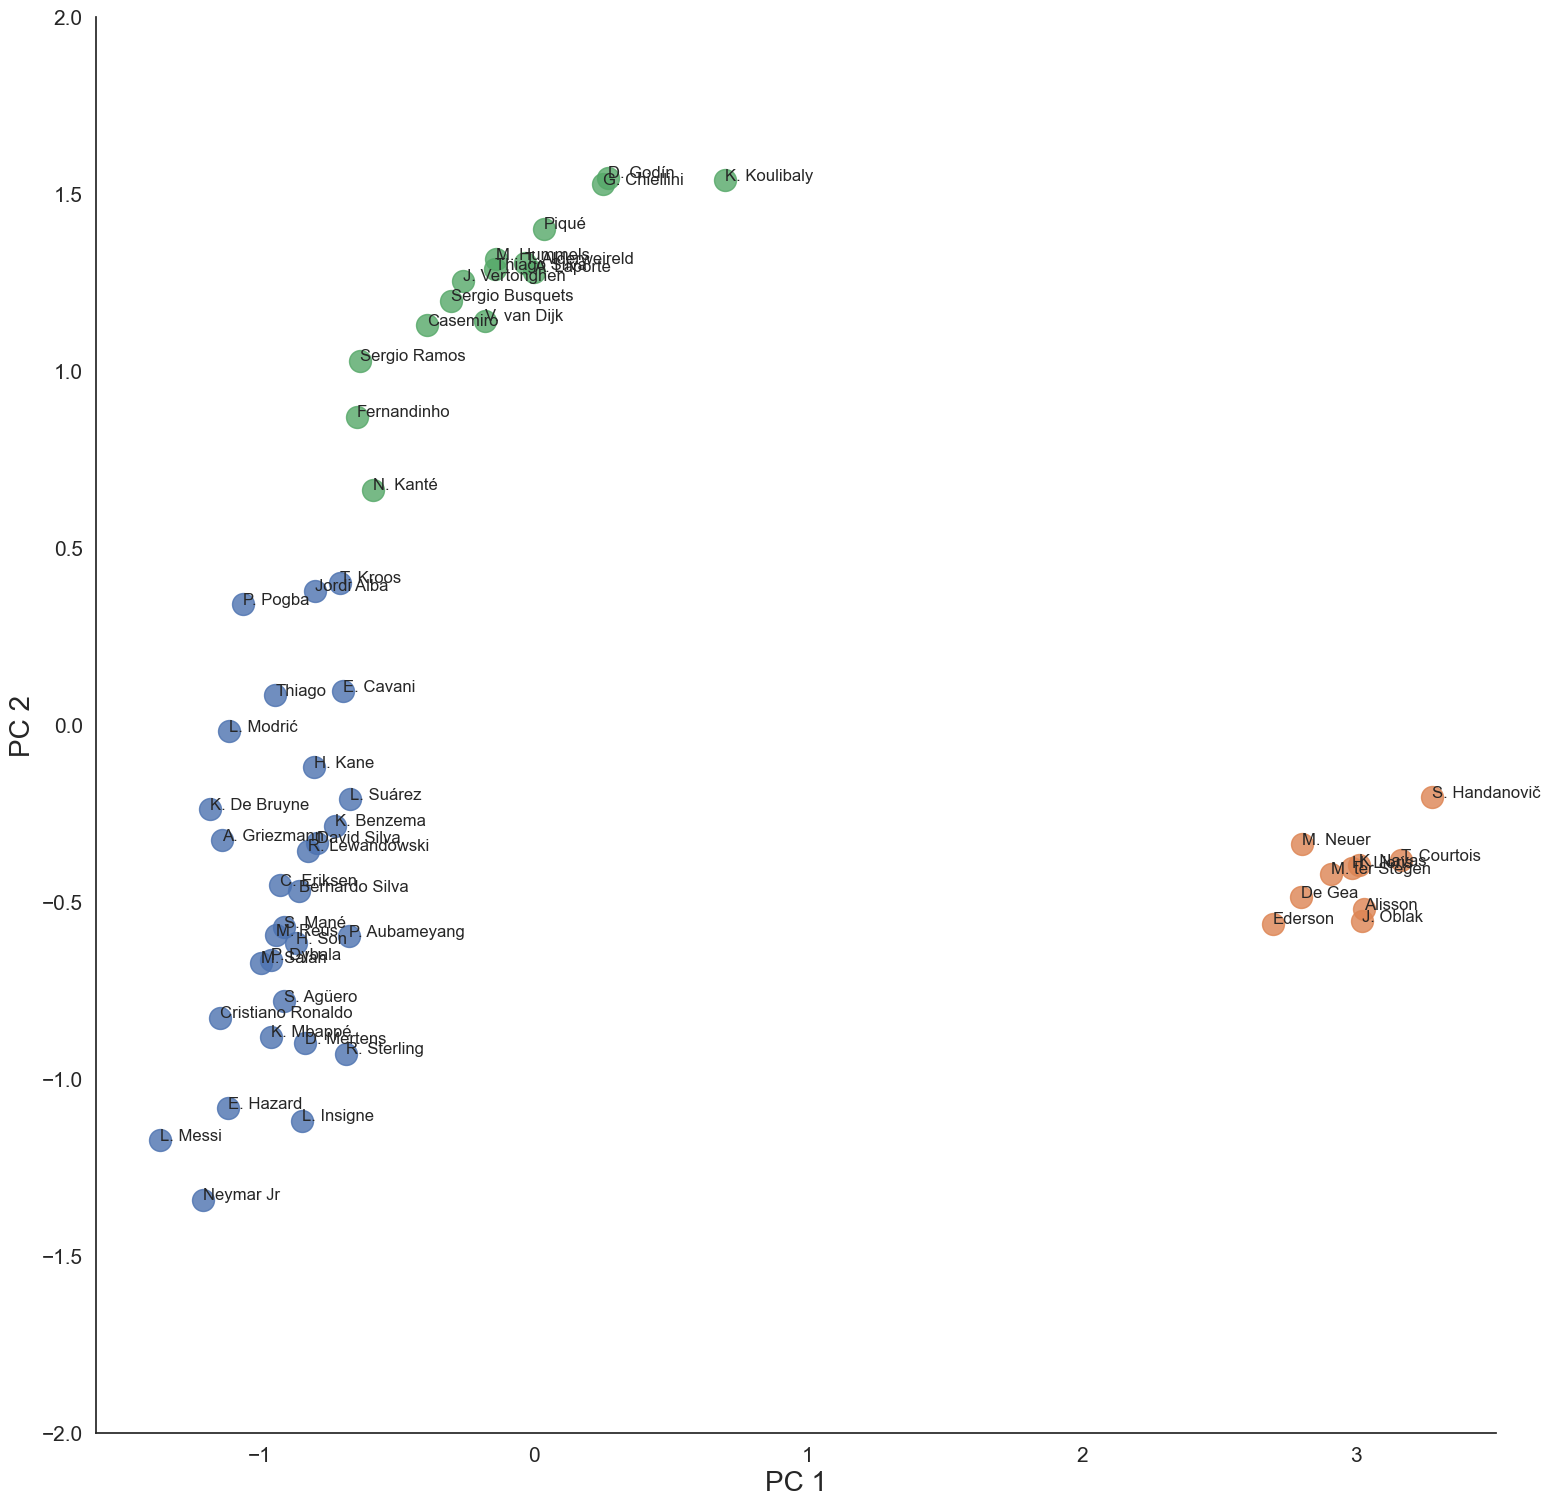

In [65]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

## Elbow Technique

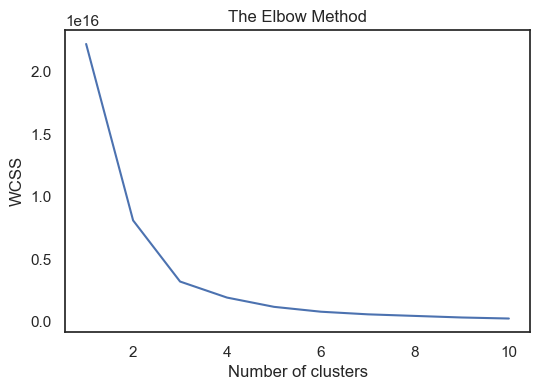

In [66]:
#elbow method
from sklearn.cluster import KMeans
x = data.values
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie., the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

## Evaluation Metrics

In [67]:
label=labels
label

array([0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0])

In [68]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X_norm,label)
score

0.41742352963456236

Silhouette score we got is 0.41. The score is greater than zero, which means clusters are well apart from each other and clearly distingushed.

# CONCLUSION

* Most of the players age is between 20-25.

* Most of the players are from England.

* After the age of 38, the players are not showing any improvement.

* The Right Wing players tend to get paid the most.

* Highest prefered foot of the players is Right.

* Maximum number of player at Top 20 are from FC Barcelona , Real Madrid , Liverpool and so on

* Neymar Jr is the most valueable player in Fifa 20

* The optimal number of clusters for the data is 3.

* The silhouette score is 0.41 and the clusters are well apart from each other and clearly distingushed